In [122]:
import requests
import time
import pandas as pd
import numpy as np
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot
import plotly.express as px
import folium
from folium import plugins
import ipywidgets
import geocoder
import numpy as np
import pandas as pd
from vega_datasets import data as vds
from branca.element import Figure

In [2]:
# Primera vista de mi dataframe de Derechos aplicados
data_prod_covid = pd.read_csv("Productos seleccionados relacionados al COVID 19 2017 - 2019.csv", encoding='latin-1') 
data_prod_covid.head()

,Categoría de indicador,Código indicador,Indicador,Código economía declarante,ISO3A código economía declarante,Economía declarante,Código economía asociada,ISO3A código economía asociada,Economía asociada,Código clasificación de productos/sectores,...,Período,Código frecuencia,Frequencia,Código unidad,Unidad,Año,Código metadatos del valor,Metadatos del valor,Valor (no numérico),Valor
0,Importaciones bilaterales,HS_M_0010,Importaciones bilaterales por códigos detallad...,32,ARG,Argentina,0,NaN,Mundo,HS,...,Anual,A,Anual,USD,Dólares EE.UU.,2018,NaN,NaN,NaN,13389933.84
1,Importaciones bilaterales,HS_M_0010,Importaciones bilaterales por códigos detallad...,32,ARG,Argentina,0,NaN,Mundo,HS,...,Anual,A,Anual,USD,Dólares EE.UU.,2018,NaN,NaN,NaN,14395265.13
2,Importaciones bilaterales,HS_M_0010,Importaciones bilaterales por códigos detallad...,32,ARG,Argentina,0,NaN,Mundo,HS,...,Anual,A,Anual,USD,Dólares EE.UU.,2018,NaN,NaN,NaN,6082075.48
3,Importaciones bilaterales,HS_M_0010,Importaciones bilaterales por códigos detallad...,32,ARG,Argentina,0,NaN,Mundo,HS,...,Anual,A,Anual,USD,Dólares EE.UU.,2018,NaN,NaN,NaN,36026435.92
4,Importaciones bilaterales,HS_M_0010,Importaciones bilaterales por códigos detallad...,32,ARG,Argentina,0,NaN,Mundo,HS,...,Anual,A,Anual,USD,Dólares EE.UU.,2018,NaN,NaN,NaN,11453278.36


In [3]:
#Reviso cuantas filas y columnas tiene el dataset
data_prod_covid.shape

(338622, 24)

In [4]:
#Reviso la información del dataset
data_prod_covid.describe()

,Código economía declarante,Código economía asociada,Código producto/sector,Año,Código metadatos del valor,Metadatos del valor,Valor (no numérico),Valor
count,338622.000000,338622.000000,338622.000000,338622.000000,0.0,0.0,0.0,3.386220e+05
mean,460.824049,427.752881,180366.298088,2017.512099,NaN,NaN,NaN,1.518486e+08
std,256.283325,258.303690,318005.860403,0.592408,NaN,NaN,NaN,3.565165e+09
min,8.000000,0.000000,1.000000,2017.000000,NaN,NaN,NaN,9.748500e-03
25%,214.000000,203.000000,11.000000,2017.000000,NaN,NaN,NaN,5.773528e+03
50%,462.000000,410.000000,18.000000,2017.000000,NaN,NaN,NaN,1.160803e+05
75%,690.000000,662.000000,340130.000000,2018.000000,NaN,NaN,NaN,2.234832e+06
max,918.000000,899.000000,902519.000000,2019.000000,NaN,NaN,NaN,4.285460e+11


In [5]:
data_prod_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338622 entries, 0 to 338621
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Categoría de indicador                      338622 non-null  object 
 1   Código indicador                            338622 non-null  object 
 2   Indicador                                   338622 non-null  object 
 3   Código economía declarante                  338622 non-null  int64  
 4   ISO3A código economía declarante            338622 non-null  object 
 5   Economía declarante                         338622 non-null  object 
 6   Código economía asociada                    338622 non-null  int64  
 7   ISO3A código economía asociada              332308 non-null  object 
 8   Economía asociada                           338622 non-null  object 
 9   Código clasificación de productos/sectores  338622 non-null  object 
 

In [7]:
#Obtengo las columnas con datos nulos
null_cols = data_prod_covid.isnull().sum()
null_cols

Categoría de indicador                             0
Código indicador                                   0
Indicador                                          0
Código economía declarante                         0
ISO3A código economía declarante                   0
Economía declarante                                0
Código economía asociada                           0
ISO3A código economía asociada                  6314
Economía asociada                                  0
Código clasificación de productos/sectores         0
Clasificación de productos/sectores                0
Código producto/sector                             0
Producto/Sector                                    0
Código período                                     0
Período                                            0
Código frecuencia                                  0
Frequencia                                         0
Código unidad                                      0
Unidad                                        

In [8]:
#Columnas que sí tienen valores nulos
null_cols[null_cols > 0]

ISO3A código economía asociada      6314
Código metadatos del valor        338622
Metadatos del valor               338622
Valor (no numérico)               338622
dtype: int64

In [9]:
#elimino las columnas con datos nulos
drop_cols = list(null_cols[null_cols > 0].index)
drop_cols

['ISO3A código economía asociada',
 'Código metadatos del valor',
 'Metadatos del valor',
 'Valor (no numérico)']

In [10]:
# Uso el método .drop con el parámetro axis=1 para borrar las columnas
data_prod_covid = data_prod_covid.drop(drop_cols, axis=1)

In [11]:
#Un vistazo de cómo está mi data después de las columnas borradas
data_prod_covid.head()

,Categoría de indicador,Código indicador,Indicador,Código economía declarante,ISO3A código economía declarante,Economía declarante,Código economía asociada,Economía asociada,Código clasificación de productos/sectores,Clasificación de productos/sectores,Código producto/sector,Producto/Sector,Código período,Período,Código frecuencia,Frequencia,Código unidad,Unidad,Año,Valor
0,Importaciones bilaterales,HS_M_0010,Importaciones bilaterales por códigos detallad...,32,ARG,Argentina,0,Mundo,HS,Clasificación Sistema Armonizado,220710,Alcohol etilico sin desnaturalizar con grado a...,A,Anual,A,Anual,USD,Dólares EE.UU.,2018,13389933.84
1,Importaciones bilaterales,HS_M_0010,Importaciones bilaterales por códigos detallad...,32,ARG,Argentina,0,Mundo,HS,Clasificación Sistema Armonizado,284700,"Peróxido de hidrógeno (agua oxigenada), inclus...",A,Anual,A,Anual,USD,Dólares EE.UU.,2018,14395265.13
2,Importaciones bilaterales,HS_M_0010,Importaciones bilaterales por códigos detallad...,32,ARG,Argentina,0,Mundo,HS,Clasificación Sistema Armonizado,300590,Los demás,A,Anual,A,Anual,USD,Dólares EE.UU.,2018,6082075.48
3,Importaciones bilaterales,HS_M_0010,Importaciones bilaterales por códigos detallad...,32,ARG,Argentina,0,Mundo,HS,Clasificación Sistema Armonizado,340111,De tocador (incluso los medicinales),A,Anual,A,Anual,USD,Dólares EE.UU.,2018,36026435.92
4,Importaciones bilaterales,HS_M_0010,Importaciones bilaterales por códigos detallad...,32,ARG,Argentina,0,Mundo,HS,Clasificación Sistema Armonizado,340130,Productos y preparaciones orgánicos tensoactiv...,A,Anual,A,Anual,USD,Dólares EE.UU.,2018,11453278.36


In [39]:
#Vuelvo a eliminar columnas que no aportan datos importantes
#El error salió por tratar de eliminar de nuevo otra columna =D
data_prod_covid = data_prod_covid.drop(['Código indicador', 'Categoría de indicador','Indicador', 'Código economía declarante', 'Código economía asociada', 'Código clasificación de productos/sectores','Código producto/sector', 'Código período', 'Frequencia'], axis=1)
data_prod_covid

KeyError: "['Código indicador' 'Categoría de indicador' 'Indicador'\n 'Código economía declarante' 'Código economía asociada'\n 'Código clasificación de productos/sectores' 'Código producto/sector'\n 'Código período' 'Frequencia'] not found in axis"

In [13]:
#Reviso cuales son los paises considerados como Economías declarantes
data_prod_covid['Economía declarante'].value_counts()

Unión Europea                        11625
Hong Kong, China                      9929
Canadá                                9582
Estados Unidos de América             9188
Taipei Chino                          8719
                                     ...  
Zimbabwe                              1068
Mauritania                            1059
Eswatini                               980
Lesotho                                528
República Democrática Popular Lao      460
Name: Economía declarante, Length: 80, dtype: int64

In [14]:
#Reviso los datos de los países considerados como Economías asociadas
data_prod_covid['Economía asociada'].value_counts()

Mundo                              6102
China                              5698
Estados Unidos de América          5572
Alemania                           5475
Francia                            5271
                                   ... 
Santa Sede                          246
Unión Europea, n.e.p.               212
Sudán del Sur                       193
Guinea-Bissau                       181
Unión Europea (código de socio)     120
Name: Economía asociada, Length: 190, dtype: int64

In [15]:
#Reviso los distintos productos que importan las Economías declarantes
data_prod_covid['Producto/Sector'].value_counts()

Los demás                                                                                                                                                             35301
Metales & minerales                                                                                                                                                   16157
Máquinas eléctricas                                                                                                                                                   15853
Máquinas no eléctricas                                                                                                                                                15748
Productos químicos                                                                                                                                                    15705
Manufacturas n.e.p.                                                                                                                         

In [16]:
# Busco los outliers
stats_prod_covid = data_prod_covid.describe().transpose()
stats_prod_covid

,count,mean,std,min,25%,50%,75%,max
Año,338622.0,2.017512e+03,5.924076e-01,2017.000000,2017.000000,2017.0000,2.018000e+03,2.019000e+03
Valor,338622.0,1.518486e+08,3.565165e+09,0.009749,5773.528325,116080.3008,2.234832e+06,4.285460e+11


In [17]:
stats_prod_covid['IQR'] = stats_prod_covid['75%'] - stats_prod_covid['25%']
stats_prod_covid

,count,mean,std,min,25%,50%,75%,max,IQR
Año,338622.0,2.017512e+03,5.924076e-01,2017.000000,2017.000000,2017.0000,2.018000e+03,2.019000e+03,1.000000e+00
Valor,338622.0,1.518486e+08,3.565165e+09,0.009749,5773.528325,116080.3008,2.234832e+06,4.285460e+11,2.229058e+06


In [18]:
outliers = pd.DataFrame(columns=data_prod_covid.columns)

for col in stats_prod_covid.index:
    iqr = stats_prod_covid.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats_prod_covid.at[col,'25%'] - cutoff
    upper = stats_prod_covid.at[col,'75%'] + cutoff
    results = data_prod_covid[(data_prod_covid[col] < lower) |
                   (data_prod_covid[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)

outliers

,ISO3A código economía declarante,Economía declarante,Economía asociada,Clasificación de productos/sectores,Producto/Sector,Período,Código frecuencia,Código unidad,Unidad,Año,Valor,Outlier
0,ARG,Argentina,Mundo,Clasificación Sistema Armonizado,Alcohol etilico sin desnaturalizar con grado a...,Anual,A,USD,Dólares EE.UU.,2018,1.338993e+07,Valor
1,ARG,Argentina,Mundo,Clasificación Sistema Armonizado,"Peróxido de hidrógeno (agua oxigenada), inclus...",Anual,A,USD,Dólares EE.UU.,2018,1.439527e+07,Valor
2,ARG,Argentina,Mundo,Clasificación Sistema Armonizado,Los demás,Anual,A,USD,Dólares EE.UU.,2018,6.082075e+06,Valor
3,ARG,Argentina,Mundo,Clasificación Sistema Armonizado,De tocador (incluso los medicinales),Anual,A,USD,Dólares EE.UU.,2018,3.602644e+07,Valor
4,ARG,Argentina,Mundo,Clasificación Sistema Armonizado,Productos y preparaciones orgánicos tensoactiv...,Anual,A,USD,Dólares EE.UU.,2018,1.145328e+07,Valor
...,...,...,...,...,...,...,...,...,...,...,...,...
338589,URY,Uruguay,Estados Unidos de América,Aranceles - Clasificación de productos-Negocia...,"Madera, papel, etc",Anual,A,USD,Dólares EE.UU.,2019,9.955941e+06,Valor
338593,URY,Uruguay,Estados Unidos de América,Aranceles - Clasificación de productos-Negocia...,Máquinas no eléctricas,Anual,A,USD,Dólares EE.UU.,2019,1.015835e+08,Valor
338594,URY,Uruguay,Estados Unidos de América,Aranceles - Clasificación de productos-Negocia...,Máquinas eléctricas,Anual,A,USD,Dólares EE.UU.,2019,4.770746e+07,Valor
338595,URY,Uruguay,Estados Unidos de América,Aranceles - Clasificación de productos-Negocia...,Material de transporte,Anual,A,USD,Dólares EE.UU.,2019,2.289731e+07,Valor


In [19]:
outliers['Outlier'].value_counts()

Valor    63231
Name: Outlier, dtype: int64

In [20]:
#Elimino las columnas que no me agregan datos después del proceso de detectar outliers
data_prod_covid = data_prod_covid.drop(['Código frecuencia', 'Código unidad'], axis=1)
data_prod_covid

,ISO3A código economía declarante,Economía declarante,Economía asociada,Clasificación de productos/sectores,Producto/Sector,Período,Unidad,Año,Valor
0,ARG,Argentina,Mundo,Clasificación Sistema Armonizado,Alcohol etilico sin desnaturalizar con grado a...,Anual,Dólares EE.UU.,2018,13389933.84
1,ARG,Argentina,Mundo,Clasificación Sistema Armonizado,"Peróxido de hidrógeno (agua oxigenada), inclus...",Anual,Dólares EE.UU.,2018,14395265.13
2,ARG,Argentina,Mundo,Clasificación Sistema Armonizado,Los demás,Anual,Dólares EE.UU.,2018,6082075.48
3,ARG,Argentina,Mundo,Clasificación Sistema Armonizado,De tocador (incluso los medicinales),Anual,Dólares EE.UU.,2018,36026435.92
4,ARG,Argentina,Mundo,Clasificación Sistema Armonizado,Productos y preparaciones orgánicos tensoactiv...,Anual,Dólares EE.UU.,2018,11453278.36
...,...,...,...,...,...,...,...,...,...
338617,URY,Uruguay,Serbia,Aranceles - Clasificación de productos-Negocia...,Máquinas eléctricas,Anual,Dólares EE.UU.,2019,52112.31
338618,URY,Uruguay,Serbia,Aranceles - Clasificación de productos-Negocia...,Material de transporte,Anual,Dólares EE.UU.,2019,28575.44
338619,URY,Uruguay,Serbia,Aranceles - Clasificación de productos-Negocia...,Manufacturas n.e.p.,Anual,Dólares EE.UU.,2019,20323.60
338620,URY,Uruguay,Zambia,Aranceles - Clasificación de productos-Negocia...,Bebidas & tabaco,Anual,Dólares EE.UU.,2019,320518.07


In [21]:
#Reviso de nueva cuenta los datos del dataset
data_prod_covid.dtypes

ISO3A código economía declarante        object
Economía declarante                     object
Economía asociada                       object
Clasificación de productos/sectores     object
Producto/Sector                         object
Período                                 object
Unidad                                  object
Año                                      int64
Valor                                  float64
dtype: object

In [22]:
data_prod_covid.columns

Index(['ISO3A código economía declarante', 'Economía declarante',
       'Economía asociada', 'Clasificación de productos/sectores',
       'Producto/Sector', 'Período', 'Unidad', 'Año', 'Valor'],
      dtype='object')

In [23]:
#Reviso cuales fueron las exportaciones que más realizó México de productos relacionados al Covid 19
prod_covid_imp_mexico = data_prod_covid[(data_prod_covid['Economía declarante']=='México') &
                (data_prod_covid['Producto/Sector'] )]

prod_covid_imp_mexico.head()

,ISO3A código economía declarante,Economía declarante,Economía asociada,Clasificación de productos/sectores,Producto/Sector,Período,Unidad,Año,Valor
17695,MEX,México,Mundo,Clasificación Sistema Armonizado,Alcohol etilico sin desnaturalizar con grado a...,Anual,Dólares EE.UU.,2018,84095166.0
17696,MEX,México,Mundo,Clasificación Sistema Armonizado,"Peróxido de hidrógeno (agua oxigenada), inclus...",Anual,Dólares EE.UU.,2018,22879936.0
17697,MEX,México,Mundo,Clasificación Sistema Armonizado,Los demás,Anual,Dólares EE.UU.,2018,134232998.0
17698,MEX,México,Mundo,Clasificación Sistema Armonizado,De tocador (incluso los medicinales),Anual,Dólares EE.UU.,2018,61847662.0
17699,MEX,México,Mundo,Clasificación Sistema Armonizado,Productos y preparaciones orgánicos tensoactiv...,Anual,Dólares EE.UU.,2018,44083631.0


In [24]:
prod_covid_imp_mexico.to_csv('Importaciones mexicanas de productos relacionados con el Covid 19.csv', encoding='utf-8', index=False)

In [25]:
#Reviso cuales fueron las exportaciones que más realizó Estados Unidos de productos relacionados al Covid 19
prod_covid_imp_eua = data_prod_covid[(data_prod_covid['Economía declarante']=='Estados Unidos de América') &
                (data_prod_covid['Producto/Sector'] )]

prod_covid_imp_eua.head()

,ISO3A código economía declarante,Economía declarante,Economía asociada,Clasificación de productos/sectores,Producto/Sector,Período,Unidad,Año,Valor
34215,USA,Estados Unidos de América,Mundo,Clasificación Sistema Armonizado,Alcohol etilico sin desnaturalizar con grado a...,Anual,Dólares EE.UU.,2018,644154539.0
34216,USA,Estados Unidos de América,Mundo,Clasificación Sistema Armonizado,"Peróxido de hidrógeno (agua oxigenada), inclus...",Anual,Dólares EE.UU.,2018,45776378.0
34217,USA,Estados Unidos de América,Mundo,Clasificación Sistema Armonizado,Los demás,Anual,Dólares EE.UU.,2018,581492646.0
34218,USA,Estados Unidos de América,Mundo,Clasificación Sistema Armonizado,De tocador (incluso los medicinales),Anual,Dólares EE.UU.,2018,256293878.0
34219,USA,Estados Unidos de América,Mundo,Clasificación Sistema Armonizado,Productos y preparaciones orgánicos tensoactiv...,Anual,Dólares EE.UU.,2018,438583557.0


In [26]:
prod_covid_imp_eua.to_csv('Importaciones estadounidenses de productos relacionados con el Covid 19.csv', encoding='utf-8', index=False)

In [27]:
#Reviso cuales fueron las exportaciones que más realizó China de productos relacionados al Covid 19
prod_covid_imp_china = data_prod_covid[(data_prod_covid['Economía declarante']=='China') &
                (data_prod_covid['Producto/Sector'] )]

prod_covid_imp_china.head()

,ISO3A código economía declarante,Economía declarante,Economía asociada,Clasificación de productos/sectores,Producto/Sector,Período,Unidad,Año,Valor
6054,CHN,China,Mundo,Clasificación Sistema Armonizado,Alcohol etilico sin desnaturalizar con grado a...,Anual,Dólares EE.UU.,2018,158958927.0
6055,CHN,China,Mundo,Clasificación Sistema Armonizado,"Peróxido de hidrógeno (agua oxigenada), inclus...",Anual,Dólares EE.UU.,2018,33698666.0
6056,CHN,China,Mundo,Clasificación Sistema Armonizado,Los demás,Anual,Dólares EE.UU.,2018,67972318.0
6057,CHN,China,Mundo,Clasificación Sistema Armonizado,De tocador (incluso los medicinales),Anual,Dólares EE.UU.,2018,59096692.0
6058,CHN,China,Mundo,Clasificación Sistema Armonizado,Productos y preparaciones orgánicos tensoactiv...,Anual,Dólares EE.UU.,2018,186238559.0


In [31]:
prod_covid_imp_china.to_csv('Importaciones chinas de productos relacionados con el Covid 19.csv', encoding='utf-8', index=False)

In [28]:
mexico = pd.read_csv('Importaciones mexicanas de productos relacionados con el Covid 19.csv')
# Obtengo los índices de las filas que tienen "los demás"
index_losdemas_mexico = mexico[ mexico['Producto/Sector'] == 'Los demás' ].index
# Borro esos índices del dataFrame
mexico.drop(index_losdemas_mexico , inplace=True)
# Obtengo los índices de las filas que tienen "las demás"
index_lasdemas_mexico = mexico[ mexico['Producto/Sector'] == 'Las demás' ].index
mexico.drop(index_lasdemas_mexico , inplace=True)
# Obtengo los índices de las filas que tienen "Mundo"
index_mundo_mexico = mexico[ mexico['Economía asociada'] == 'Mundo' ].index
mexico.drop(index_mundo_mexico , inplace=True)
mexico.reset_index(drop=True)

,ISO3A código economía declarante,Economía declarante,Economía asociada,Clasificación de productos/sectores,Producto/Sector,Período,Unidad,Año,Valor
0,MEX,México,Afganistán,Clasificación Sistema Armonizado,Productos y preparaciones orgánicos tensoactiv...,Anual,Dólares EE.UU.,2018,20.0
1,MEX,México,Afganistán,Clasificación Sistema Armonizado,Preparaciones acondicionadas para la venta al ...,Anual,Dólares EE.UU.,2018,6.0
2,MEX,México,Afganistán,Clasificación Sistema Armonizado,"Prendas y accesorios, de vestir (incluidos los...",Anual,Dólares EE.UU.,2018,57.0
3,MEX,México,Afganistán,Clasificación Sistema Armonizado,"Aparatos de ozonoterapia, oxigenoterapia o aer...",Anual,Dólares EE.UU.,2018,57.0
4,MEX,México,Albania,Clasificación Sistema Armonizado,"De líquido, con lectura directa",Anual,Dólares EE.UU.,2018,400.0
...,...,...,...,...,...,...,...,...,...
6213,MEX,México,Zambia,Aranceles - Clasificación de productos-Negocia...,"Semillas oleaginosas, grasas & aceites",Anual,Dólares EE.UU.,2017,3590.0
6214,MEX,México,Zambia,Aranceles - Clasificación de productos-Negocia...,Metales & minerales,Anual,Dólares EE.UU.,2017,9550.0
6215,MEX,México,Zambia,Aranceles - Clasificación de productos-Negocia...,Productos químicos,Anual,Dólares EE.UU.,2017,6536.0
6216,MEX,México,Zambia,Aranceles - Clasificación de productos-Negocia...,Máquinas no eléctricas,Anual,Dólares EE.UU.,2017,3151.0


In [29]:
estados_unidos = pd.read_csv('Importaciones estadounidenses de productos relacionados con el Covid 19.csv')
# Obtengo los índices de las filas que tienen "los demás"
index_losdemas_estados_unidos = estados_unidos[ estados_unidos['Producto/Sector'] == 'Los demás' ].index
# Borro esos índices del dataFrame
estados_unidos.drop(index_losdemas_estados_unidos , inplace=True)
# Obtengo los índices de las filas que tienen "las demás"
index_lasdemas_estados_unidos = estados_unidos[ estados_unidos['Producto/Sector'] == 'Las demás' ].index
estados_unidos.drop(index_lasdemas_estados_unidos , inplace=True)
# Obtengo los índices de las filas que tienen "Mundo"
index_mundo_estados_unidos = estados_unidos[ estados_unidos['Economía asociada'] == 'Mundo' ].index
estados_unidos.drop(index_mundo_estados_unidos , inplace=True)
estados_unidos.reset_index(drop=True)

,ISO3A código economía declarante,Economía declarante,Economía asociada,Clasificación de productos/sectores,Producto/Sector,Período,Unidad,Año,Valor
0,USA,Estados Unidos de América,Afganistán,Clasificación Sistema Armonizado,Los demás aparatos respiratorios y máscaras an...,Anual,Dólares EE.UU.,2018,6799.0
1,USA,Estados Unidos de América,Argelia,Clasificación Sistema Armonizado,"Aparatos de ozonoterapia, oxigenoterapia o aer...",Anual,Dólares EE.UU.,2018,3482.0
2,USA,Estados Unidos de América,Andorra,Clasificación Sistema Armonizado,Los demás instrumentos y aparatos,Anual,Dólares EE.UU.,2018,21838.0
3,USA,Estados Unidos de América,Antigua y Barbuda,Clasificación Sistema Armonizado,Los demás instrumentos y aparatos,Anual,Dólares EE.UU.,2018,3288.0
4,USA,Estados Unidos de América,Azerbaiyán,Clasificación Sistema Armonizado,Los demás aparatos respiratorios y máscaras an...,Anual,Dólares EE.UU.,2018,28188.0
...,...,...,...,...,...,...,...,...,...
7733,USA,Estados Unidos de América,Zambia,Aranceles - Clasificación de productos-Negocia...,Prendas de vestir,Anual,Dólares EE.UU.,2017,1605.0
7734,USA,Estados Unidos de América,Zambia,Aranceles - Clasificación de productos-Negocia...,"Cueros, calzado, etc",Anual,Dólares EE.UU.,2017,39929.0
7735,USA,Estados Unidos de América,Zambia,Aranceles - Clasificación de productos-Negocia...,Máquinas no eléctricas,Anual,Dólares EE.UU.,2017,74407.0
7736,USA,Estados Unidos de América,Zambia,Aranceles - Clasificación de productos-Negocia...,Máquinas eléctricas,Anual,Dólares EE.UU.,2017,10528.0


In [32]:
china = pd.read_csv('Importaciones chinas de productos relacionados con el Covid 19.csv')
# Obtengo los índices de las filas que tienen "los demás"
index_losdemas_china = china[ china['Producto/Sector'] == 'Los demás' ].index
# Borro esos índices del dataFrame
china.drop(index_losdemas_china , inplace=True)
# Obtengo los índices de las filas que tienen "las demás"
index_lasdemas_china = china[ china['Producto/Sector'] == 'Las demás' ].index
china.drop(index_lasdemas_china , inplace=True)
# Obtengo los índices de las filas que tienen "Mundo"
index_mundo_china = china[ china['Economía asociada'] == 'Mundo' ].index
china.drop(index_mundo_china , inplace=True)
china.reset_index(drop=True)

,ISO3A código economía declarante,Economía declarante,Economía asociada,Clasificación de productos/sectores,Producto/Sector,Período,Unidad,Año,Valor
0,CHN,China,Afganistán,Clasificación Sistema Armonizado,De tocador (incluso los medicinales),Anual,Dólares EE.UU.,2018,1415.0
1,CHN,China,Afganistán,Clasificación Sistema Armonizado,Jeringas incluso con agujas,Anual,Dólares EE.UU.,2018,18.0
2,CHN,China,Azerbaiyán,Clasificación Sistema Armonizado,Los demás instrumentos y aparatos,Anual,Dólares EE.UU.,2018,200.0
3,CHN,China,Argentina,Clasificación Sistema Armonizado,Desinfectantes,Anual,Dólares EE.UU.,2018,93252.0
4,CHN,China,Argentina,Clasificación Sistema Armonizado,"Prendas y accesorios, de vestir (incluidos los...",Anual,Dólares EE.UU.,2018,325.0
...,...,...,...,...,...,...,...,...,...
6684,CHN,China,Zambia,Aranceles - Clasificación de productos-Negocia...,Textiles,Anual,Dólares EE.UU.,2017,535.0
6685,CHN,China,Zambia,Aranceles - Clasificación de productos-Negocia...,"Cueros, calzado, etc",Anual,Dólares EE.UU.,2017,1012944.0
6686,CHN,China,Zambia,Aranceles - Clasificación de productos-Negocia...,Máquinas eléctricas,Anual,Dólares EE.UU.,2017,21554.0
6687,CHN,China,Zambia,Aranceles - Clasificación de productos-Negocia...,Material de transporte,Anual,Dólares EE.UU.,2017,481.0


In [262]:
#Obtengo datos de los principales países de donde México importo productos relacionados con el Covid 19
economias_de_las_que_importo_mexico.head()

Estados Unidos de América    80
Alemania                     79
Francia                      76
Corea, República de          75
Italia                       75
Name: Economía asociada, dtype: int64

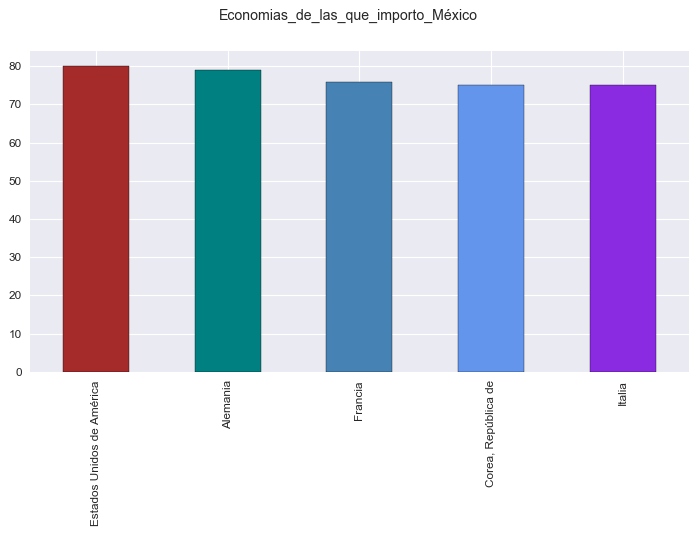

In [238]:
#Grafico los resultados con una gráfica de barras apoyado con matplotlib
economias_de_las_que_importo_mexico = mexico['Economía asociada'].value_counts()
fig = plt.figure(figsize=(10,5), dpi=85)
fig.suptitle("Economias_de_las_que_importo_México")
economias_de_las_que_importo_mexico.head().plot(kind='bar',
            color=('brown', 'teal', 'steelblue', 'cornflowerblue', 'blueviolet'), edgecolor = 'black')
plt.savefig("Economias_de_las_que_importo_México 2017-2019.jpg")

In [263]:
#Obtengo los principales productos o servicios relacionados con el Cvid 19 que importó México
productos_o_servicios_que_importo_mexico.head()

Máquinas eléctricas       366
Máquinas no eléctricas    356
Metales & minerales       355
Manufacturas n.e.p.       340
Productos químicos        337
Name: Producto/Sector, dtype: int64

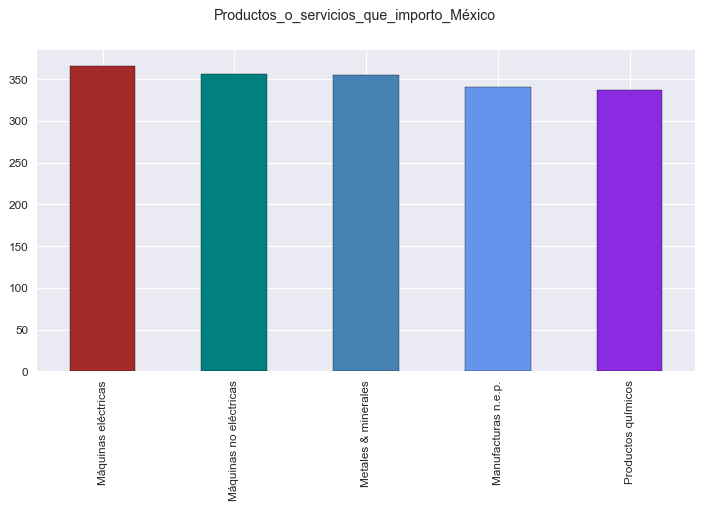

In [239]:
#Grafico los resultados con una gráfica de barras apoyado con matplotlib
productos_o_servicios_que_importo_mexico = mexico['Producto/Sector'].value_counts()
fig = plt.figure(figsize=(10,5), dpi=85)
fig.suptitle("Productos_o_servicios_que_importo_México")
productos_o_servicios_que_importo_mexico.head().plot(kind='bar',
            color=('brown', 'teal', 'steelblue', 'cornflowerblue', 'blueviolet'), edgecolor = 'black')
plt.savefig("Productos_o_servicios_que_importo_México.jpg")

In [264]:
#Obtengo datos de los principales países de donde Estados Unidos importo productos relacionados con el Covid 19
economias_de_las_que_importo_usa.head()

Alemania    79
Italia      79
Canadá      79
México      79
China       79
Name: Economía asociada, dtype: int64

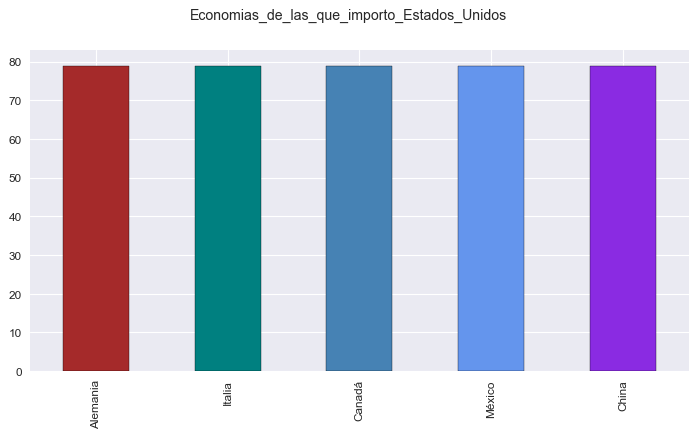

In [240]:
#Grafico los resultados con una gráfica de barras apoyado con matplotlib
economias_de_las_que_importo_usa = estados_unidos['Economía asociada'].value_counts()
fig = plt.figure(figsize=(10,5), dpi=85)
fig.suptitle("Economias_de_las_que_importo_Estados_Unidos")
economias_de_las_que_importo_usa.head().plot(kind='bar',
            color=('brown', 'teal', 'steelblue', 'cornflowerblue', 'blueviolet'), edgecolor = 'black')
plt.savefig("Economias_de_las_que_importo_Estados_Unidos.jpg")

In [265]:
#Obtengo los principales productos o servicios relacionados con el Cvid 19 que importó Estados Unidos
productos_o_servicios_que_importo_usa.head()

Manufacturas n.e.p.       364
Metales & minerales       360
Máquinas no eléctricas    357
Máquinas eléctricas       352
Madera, papel, etc        352
Name: Producto/Sector, dtype: int64

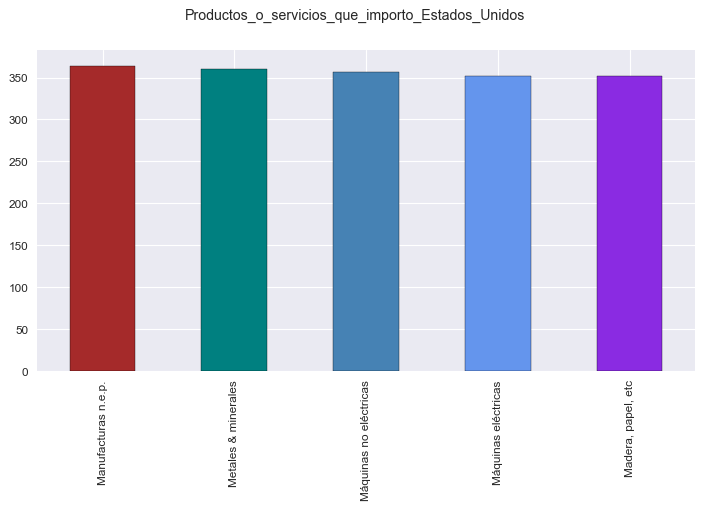

In [241]:
#Grafico los resultados con una gráfica de barras apoyado con matplotlib
productos_o_servicios_que_importo_usa = estados_unidos['Producto/Sector'].value_counts()
fig = plt.figure(figsize=(10,5), dpi=85)
fig.suptitle("Productos_o_servicios_que_importo_Estados_Unidos")
productos_o_servicios_que_importo_usa.head().plot(kind='bar',
            color=('brown', 'teal', 'steelblue', 'cornflowerblue', 'blueviolet'), edgecolor = 'black')
plt.savefig("Productos_o_servicios_que_importo_Estados_Unidos.jpg")

In [266]:
#Obtengo datos de los principales países de donde China importo productos relacionados con el Covid 19
economias_de_las_que_importo_china.head()

Estados Unidos de América    80
Alemania                     80
Japón                        80
Francia                      78
Corea, República de          76
Name: Economía asociada, dtype: int64

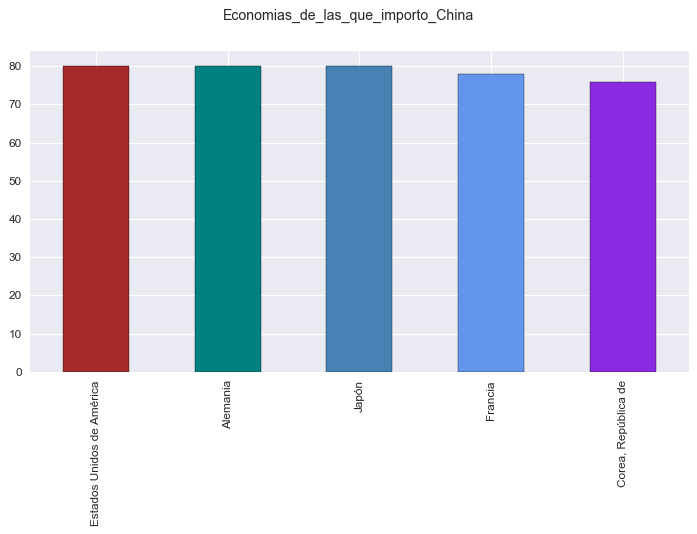

In [242]:
#Grafico los resultados con una gráfica de barras apoyado con matplotlib
economias_de_las_que_importo_china = china['Economía asociada'].value_counts()
fig = plt.figure(figsize=(10,5), dpi=85)
fig.suptitle("Economias_de_las_que_importo_China")
economias_de_las_que_importo_china.head().plot(kind='bar',
            color=('brown', 'teal', 'steelblue', 'cornflowerblue', 'blueviolet'), edgecolor = 'black')
plt.savefig("Economias_de_las_que_importo_China.jpg")

In [267]:
#Obtengo los principales productos o servicios relacionados con el Cvid 19 que importó China
productos_o_servicios_que_importo_china.head()

Máquinas eléctricas    359
Metales & minerales    348
Manufacturas n.e.p.    327
Productos químicos     324
Madera, papel, etc     322
Name: Producto/Sector, dtype: int64

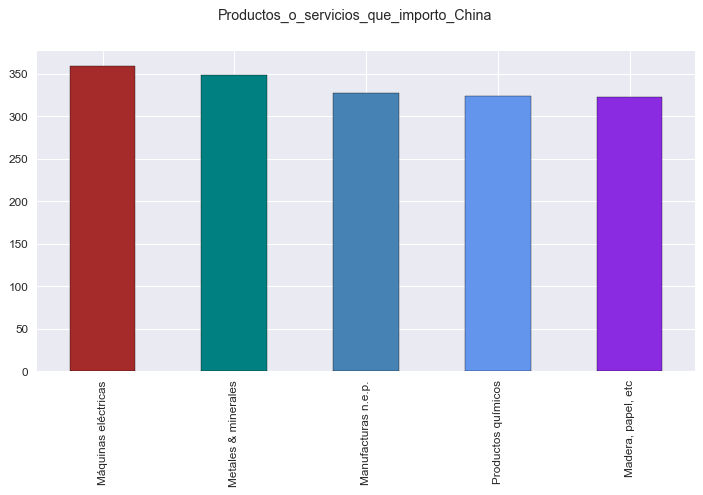

In [243]:
#Grafico los resultados con una gráfica de barras apoyado con matplotlib
productos_o_servicios_que_importo_china = china['Producto/Sector'].value_counts()
fig = plt.figure(figsize=(10,5), dpi=85)
fig.suptitle("Productos_o_servicios_que_importo_China")
productos_o_servicios_que_importo_china.head().plot(kind='bar',
            color=('brown', 'teal', 'steelblue', 'cornflowerblue', 'blueviolet'), edgecolor = 'black')
plt.savefig("Productos_o_servicios_que_importo_China.jpg")

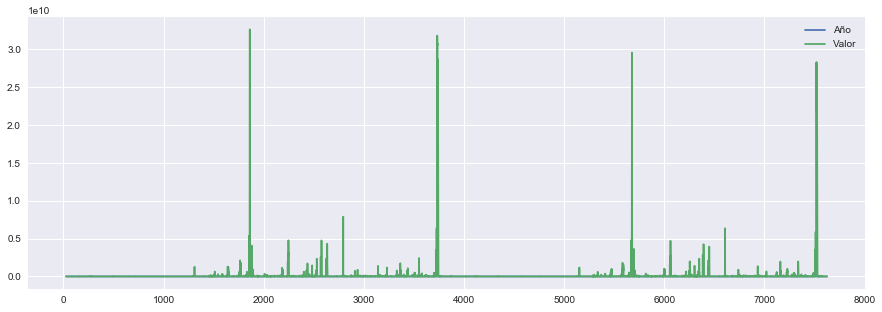

In [142]:
mexico.plot(grid=True, figsize=(15,5))

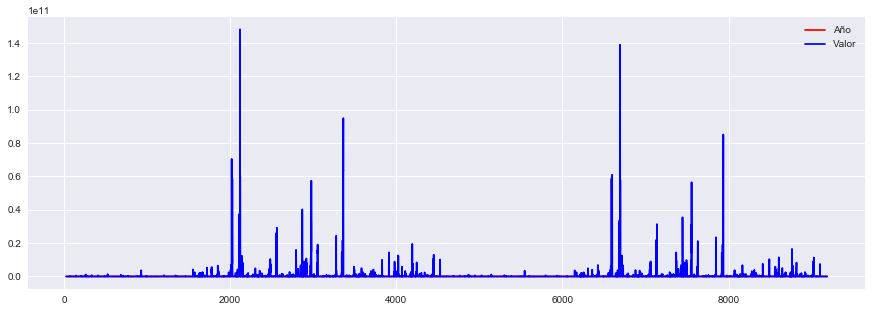

In [147]:
estados_unidos.plot(grid=True, figsize=(15,5), color = ["r", "b"])

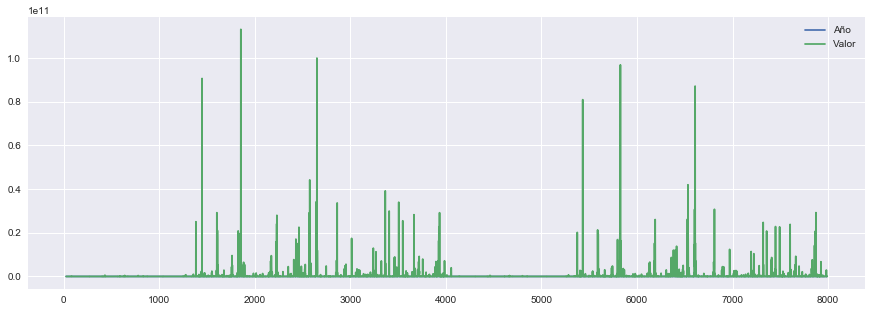

In [144]:
china.plot(grid=True, figsize=(15,5))

In [268]:
#Obtengo los datos sobre el valor de las importaciones realizadas por México en en 2017 y 2018
mexico.groupby('Año').Valor.sum()

Año
2017    4.072131e+11
2018    4.492088e+11
Name: Valor, dtype: float64

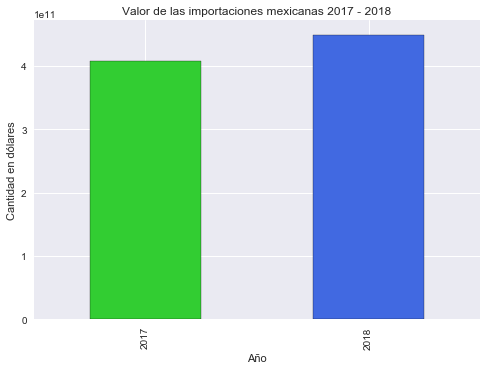

In [232]:
#Grafico los resultados con una gráfica de barras apoyado con matplotlib
fig1 = plt.figure()
fig.suptitle("Valor de las importaciones mexicanas por año")
plt.title("Valor de las importaciones mexicanas 2017 - 2018")
plt.xlabel("Año")                       
plt.ylabel("Cantidad en dólares")
mexico.groupby('Año').Valor.sum().plot(kind='bar', color=('limegreen', 'royalblue'), edgecolor = 'black')
plt.savefig("Valor de las importaciones mexicanas por año.jpg")

In [269]:
#Obtengo los datos sobre el valor de las importaciones realizadas por Estados Unidos en en 2017 y 2018
estados_unidos.groupby('Año').Valor.sum()

Año
2017    2.256904e+12
2018    2.469226e+12
Name: Valor, dtype: float64

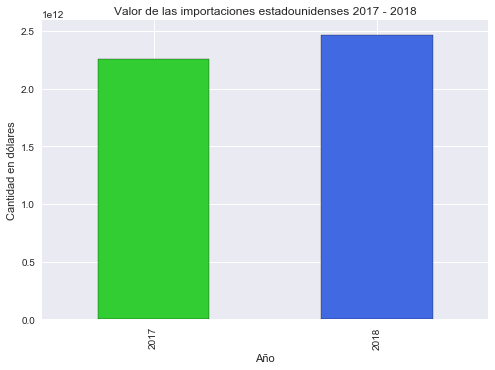

In [231]:
#Grafico los resultados con una gráfica de barras apoyado con matplotlib
fig1 = plt.figure()
fig.suptitle("Valor de las importaciones estadounidenses por año")
plt.title("Valor de las importaciones estadounidenses 2017 - 2018")
plt.xlabel("Año")                       
plt.ylabel("Cantidad en dólares")
estados_unidos.groupby('Año').Valor.sum().plot(kind='bar', color=('limegreen', 'royalblue'), edgecolor = 'black')
plt.savefig("Valor de las importaciones estadounidenses por año.jpg")

In [270]:
#Obtengo los datos sobre el valor de las importaciones realizadas por China en en 2017 y 2018
china.groupby('Año').Valor.sum()

Año
2017    1.693188e+12
2018    1.972733e+12
Name: Valor, dtype: float64

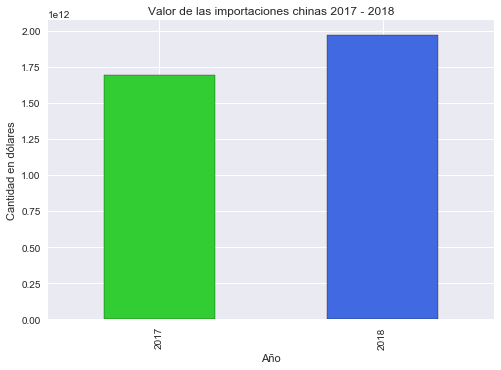

In [233]:
#Grafico los resultados con una gráfica de barras apoyado con matplotlib
fig1 = plt.figure()
fig.suptitle("Valor de las importaciones chinas por año")
plt.title("Valor de las importaciones chinas 2017 - 2018")
plt.xlabel("Año")                       
plt.ylabel("Cantidad en dólares")
china.groupby('Año').Valor.sum().plot(kind='bar', color=('limegreen', 'royalblue'), edgecolor = 'black')
plt.savefig("Valor de las importaciones chinas por año.jpg")

In [162]:
#Obtengo los datos sobre el valor de las importaciones realizadas por el resto de los países dle mundo en 2019
importaciones_2019_covid_mundo = data_prod_covid[(data_prod_covid['Año'] == 2019) &
                (data_prod_covid['Economía declarante'])]
importaciones_2019_covid_mundo.head(10)

,ISO3A código economía declarante,Economía declarante,Economía asociada,Clasificación de productos/sectores,Producto/Sector,Período,Unidad,Año,Valor
321506,CHT,Taipei Chino,Mundo,Clasificación Sistema Armonizado,Alcohol etilico sin desnaturalizar con grado a...,Anual,Dólares EE.UU.,2019,3.250500e+07
321507,CHT,Taipei Chino,Mundo,Clasificación Sistema Armonizado,"Peróxido de hidrógeno (agua oxigenada), inclus...",Anual,Dólares EE.UU.,2019,3.290300e+07
321508,CHT,Taipei Chino,Mundo,Clasificación Sistema Armonizado,Los demás,Anual,Dólares EE.UU.,2019,2.484900e+07
321509,CHT,Taipei Chino,Mundo,Clasificación Sistema Armonizado,De tocador (incluso los medicinales),Anual,Dólares EE.UU.,2019,2.954600e+07
321510,CHT,Taipei Chino,Mundo,Clasificación Sistema Armonizado,Productos y preparaciones orgánicos tensoactiv...,Anual,Dólares EE.UU.,2019,1.045380e+08
321511,CHT,Taipei Chino,Mundo,Clasificación Sistema Armonizado,Preparaciones acondicionadas para la venta al ...,Anual,Dólares EE.UU.,2019,1.072790e+08
321512,CHT,Taipei Chino,Mundo,Clasificación Sistema Armonizado,Desinfectantes,Anual,Dólares EE.UU.,2019,4.296700e+07
321513,CHT,Taipei Chino,Mundo,Clasificación Sistema Armonizado,Los demás,Anual,Dólares EE.UU.,2019,1.484285e+09
321514,CHT,Taipei Chino,Mundo,Clasificación Sistema Armonizado,"Prendas y accesorios, de vestir (incluidos los...",Anual,Dólares EE.UU.,2019,1.790100e+07
321515,CHT,Taipei Chino,Mundo,Clasificación Sistema Armonizado,Las demás,Anual,Dólares EE.UU.,2019,5.254230e+08


In [163]:
importaciones_2019_covid_mundo.to_csv('Importaciones de productos relacionados con el Covid 19 realizadas en 2019.csv', encoding='utf-8', index=False)

In [174]:
importaciones_covid_mundo = pd.read_csv('Importaciones de productos relacionados con el Covid 19 realizadas en 2019.csv')
# Obtengo los índices de las filas que tienen "los demás"
index_losdemas_mundo = importaciones_covid_mundo[ importaciones_covid_mundo['Producto/Sector'] == 'Los demás' ].index
# Borro esos índices del dataFrame
importaciones_covid_mundo.drop(index_losdemas_mundo , inplace=True)
# Obtengo los índices de las filas que tienen "las demás"
index_lasdemas_mundo = importaciones_covid_mundo[ importaciones_covid_mundo['Producto/Sector'] == 'Las demás' ].index
importaciones_covid_mundo.drop(index_lasdemas_mundo , inplace=True)
# Obtengo los índices de las filas que tienen "Mundo"
index_mundo_mundo = importaciones_covid_mundo[ importaciones_covid_mundo['Economía asociada'] == 'Mundo' ].index
importaciones_covid_mundo.drop(index_mundo_mundo , inplace=True)
importaciones_covid_mundo.reset_index(drop=True)

,ISO3A código economía declarante,Economía declarante,Economía asociada,Clasificación de productos/sectores,Producto/Sector,Período,Unidad,Año,Valor
0,CHT,Taipei Chino,Argentina,Clasificación Sistema Armonizado,Desinfectantes,Anual,Dólares EE.UU.,2019,132000.00
1,CHT,Taipei Chino,Argentina,Clasificación Sistema Armonizado,Los demás instrumentos y aparatos,Anual,Dólares EE.UU.,2019,977000.00
2,CHT,Taipei Chino,Australia,Clasificación Sistema Armonizado,Alcohol etilico sin desnaturalizar con grado a...,Anual,Dólares EE.UU.,2019,6072000.00
3,CHT,Taipei Chino,Australia,Clasificación Sistema Armonizado,De tocador (incluso los medicinales),Anual,Dólares EE.UU.,2019,2751000.00
4,CHT,Taipei Chino,Australia,Clasificación Sistema Armonizado,Productos y preparaciones orgánicos tensoactiv...,Anual,Dólares EE.UU.,2019,1546000.00
...,...,...,...,...,...,...,...,...,...
14651,URY,Uruguay,Serbia,Aranceles - Clasificación de productos-Negocia...,Máquinas eléctricas,Anual,Dólares EE.UU.,2019,52112.31
14652,URY,Uruguay,Serbia,Aranceles - Clasificación de productos-Negocia...,Material de transporte,Anual,Dólares EE.UU.,2019,28575.44
14653,URY,Uruguay,Serbia,Aranceles - Clasificación de productos-Negocia...,Manufacturas n.e.p.,Anual,Dólares EE.UU.,2019,20323.60
14654,URY,Uruguay,Zambia,Aranceles - Clasificación de productos-Negocia...,Bebidas & tabaco,Anual,Dólares EE.UU.,2019,320518.07


In [175]:
#Obtengo los datos de las importaciones más importantes realizadas por los los demás paises del mundo en 2019
importaciones_covid_mundo_importadores = importaciones_covid_mundo['Producto/Sector'].value_counts()
importaciones_covid_mundo_importadores.head(10)


Metales & minerales           834
Máquinas eléctricas           814
Productos químicos            796
Manufacturas n.e.p.           785
Máquinas no eléctricas        762
Prendas de vestir             749
Madera, papel, etc            720
Cueros, calzado, etc          701
Textiles                      679
Frutas, legumbres, plantas    578
Name: Producto/Sector, dtype: int64

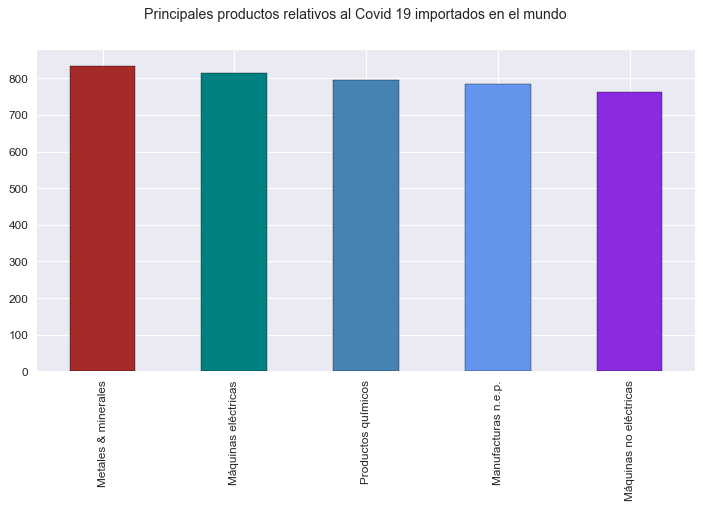

In [244]:
#Grafico los resultados con una gráfica de barras apoyado con matplotlib
fig = plt.figure(figsize=(10,5), dpi=85)
fig.suptitle("Principales productos relativos al Covid 19 importados en el mundo")
importaciones_covid_mundo_importadores.head().plot(kind='bar',
            color=('brown', 'teal', 'steelblue', 'cornflowerblue', 'blueviolet'), edgecolor = 'black')
plt.savefig("Principales importadores de productos relativos al Covid 19 en el mundo")

In [179]:
#Obtengo los datos sobre los principales países importadores en el 2019
importaciones_covid_mundo_productos_servicios = importaciones_covid_mundo['Economía declarante'].value_counts()
importaciones_covid_mundo_productos_servicios.head(10)

Hong Kong, China      2788
Taipei Chino          2443
Colombia              2176
Mongolia              1652
Seychelles            1447
Uruguay               1392
Macao, China          1388
República Kirguisa    1370
Name: Economía declarante, dtype: int64

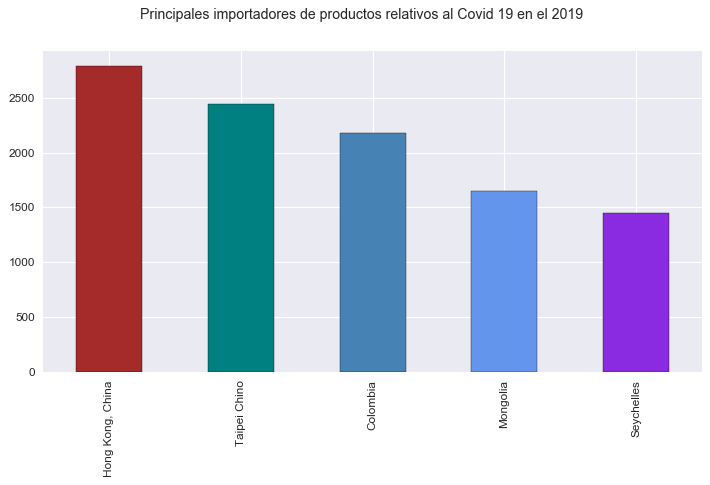

In [245]:
#Grafico los resultados con una gráfica de barras apoyado con matplotlib
fig = plt.figure(figsize=(10,5), dpi=85)
fig.suptitle("Principales importadores de productos relativos al Covid 19 en el 2019")
importaciones_covid_mundo_productos_servicios.head().plot(kind='bar',
            color=('brown', 'teal', 'steelblue', 'cornflowerblue', 'blueviolet'), edgecolor = 'black')
plt.savefig("Principales importadores de productos relativos al Covid 19 en el 2019")

[None, None, None, None, None, None, None, None]

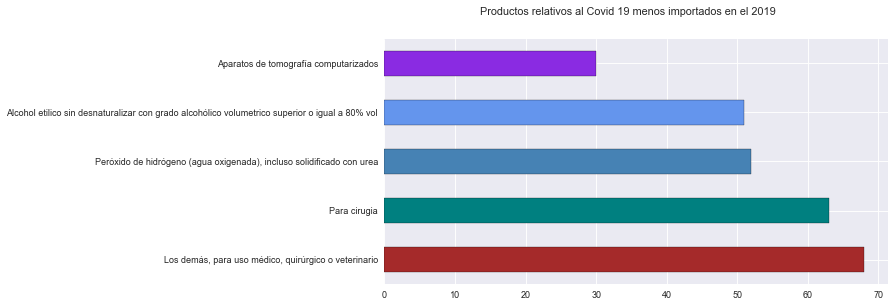

In [261]:
#Grafico los resultados con una gráfica de barras apoyado con matplotlib
importaciones_covid_mundo_menos_importadores = importaciones_covid_mundo['Producto/Sector'].value_counts()
importaciones_covid_mundo_menos_importadores.tail(5)
fig = plt.figure(figsize=(10,5), dpi=65)
fig.suptitle("Productos relativos al Covid 19 menos importados en el 2019")
importaciones_covid_mundo_menos_importadores.tail(5).plot(kind='barh',
            color=('brown', 'teal', 'steelblue', 'cornflowerblue', 'blueviolet'), edgecolor = 'black')


In [271]:
#Obtengo los datos de los productos menos importados en el mundo en 2019
importaciones_covid_mundo_menos_importadores.tail(5)

Los demás, para uso médico, quirúrgico o veterinario                                              68
Para cirugia                                                                                      63
Peróxido de hidrógeno (agua oxigenada), incluso solidificado con urea                             52
Alcohol etilico sin desnaturalizar con grado alcohólico volumetrico superior o igual a 80% vol    51
Aparatos de tomografía computarizados                                                             30
Name: Producto/Sector, dtype: int64